**Lip Try On**

In [ ]:
!gdown --id 1Y3ACTjJCPvYaNTTHRXJRQBqAt5wvDLjq

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Y3ACTjJCPvYaNTTHRXJRQBqAt5wvDLjq
To: /content/hairwig_try_on/shape_predictor_68_face_landmarks.dat
100% 99.7M/99.7M [00:02<00:00, 48.6MB/s]


In [ ]:
!pip install opencv-python-headless


Select a color option:
1. Punch
2. Rose
3. Brick red
4. Dusty rose
5. Nude
6. Royal blue
Enter the option number: 6


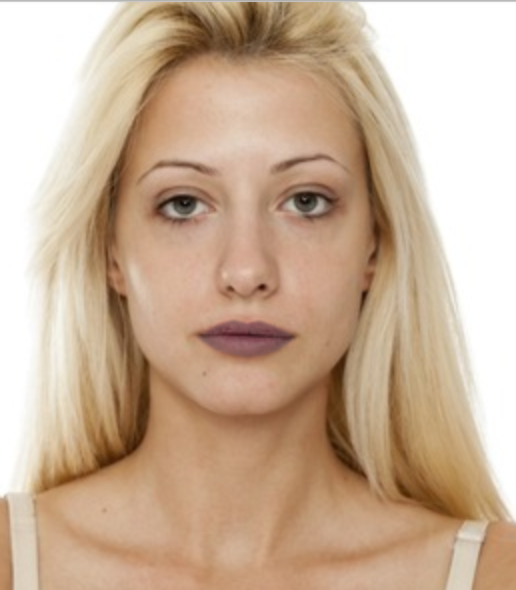

In [ ]:
import cv2
import numpy as np
import dlib
from google.colab.patches import cv2_imshow

def read_image(file_path):
    '''Read and return the image from a given file path'''
    img = cv2.imread(file_path)
    return img

def get_lip_landmark(img):
    '''Finding lip landmark and return list of corresponded coordinations'''
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("/content/hairwig_try_on/shape_predictor_68_face_landmarks.dat")
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Perform landmark detection for whole face
    faces = detector(gray_img)
    for face in faces:
        landmarks = predictor(gray_img, face)
        lmPoints = []
        # Obtain landmark coordinations for lips only, since lips landmark ranging from point 48 to 68
        for n in range(48, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            lmPoints.append([x, y])
    return lmPoints

def change_lip_color(img, color):
    '''Change lip color based on given color option'''
    img_original = img.copy()
    lm_points = get_lip_landmark(img_original)

    # Color options
    colors = {
        "1": (83, 55, 220),   # Punch
        "2": (126, 109, 229), # Rose
        "3": (14, 22, 139),   # Brick red
        "4": (106, 105, 184),# Dusty rose
        "5": (158, 172, 204),# Nude
        "6": (86, 52, 49)     # Royal blue
    }

    # Use default color (Red) if option not found
    selected_color = colors.get(color, (0, 0, 255))

    # Obtain exact coordination of the lips
    poly1 = np.array(lm_points[:12], np.int32).reshape((-1, 1, 2))
    poly2 = np.array(lm_points[12:], np.int32).reshape((-1, 1, 2))

    # Fill in the color based on the coordination by fillPoly
    colored = cv2.fillPoly(img, [poly1, poly2], selected_color)

    # Smoothen the image by GaussianBlur
    colored = cv2.GaussianBlur(colored, (7, 7), 0)

    # Blend colored lips and the original picture together
    result = cv2.addWeighted(colored, 0.3, img_original, 0.7, 0)

    return result

# Example usage:
file_path = "/content/l1.png"
original_img = read_image(file_path)

print("Select a color option:")
print("1. Punch")
print("2. Rose")
print("3. Brick red")
print("4. Dusty rose")
print("5. Nude")
print("6. Royal blue")

color_option = input("Enter the option number: ")
modified_img = change_lip_color(original_img, color_option)

cv2_imshow(modified_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
